<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/Schrodinger2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# https://www.youtube.com/watch?v=DF1SnjXZcbM

import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from scipy import sparse

In [24]:
n = 400
x, y = np.mgrid[0:1:n*1j, 0:1:n*1j]

In [25]:
def get_potential(x, y):
    return np.exp(-(x - 0.3)**2 / (2 * 0.1**2)) * np.exp(-(y - 0.3)**2 / (2 * 0.1**2))

v = get_potential(x, y)

In [26]:
diag = np.ones([n])
diags = np.array([diag, -2 * diag, diag])
d = sparse.spdiags(diags, np.array([-1,0,1]), n, n)
t = -1/2 * sparse.kronsum(d, d)
u = sparse.diags(v.reshape(n**2), (0))
h = t + u

In [27]:
eigenvalues, eigenvectors = eigsh(h, k=10, which='SM')

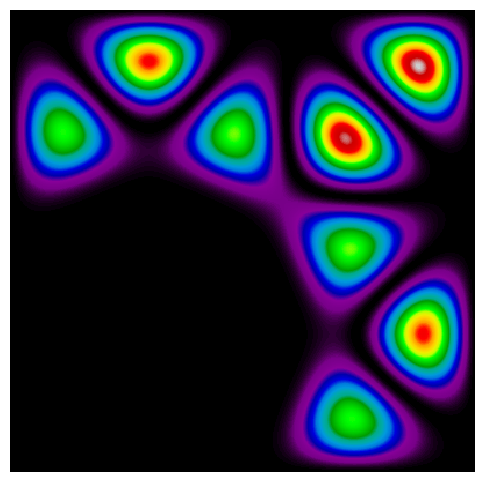

In [28]:
def get_e(n1):
    return eigenvectors.T[n1].reshape((n, n))

plt.figure(figsize=(6,6))
plt.pcolormesh(x, y, get_e(9)**2, cmap='nipy_spectral')
plt.axis('off')
plt.show()

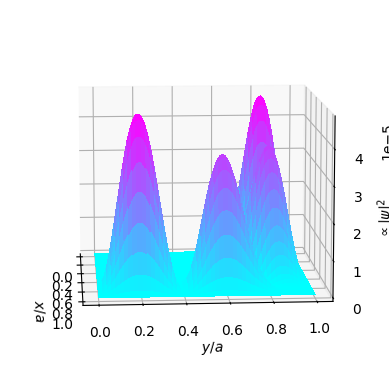

In [29]:
my_cmap = plt.get_cmap('cool')

def init():
    ax.plot_surface(x, y, get_e(3)**2, cmap=my_cmap, linewidth=0, antialiased=False)
    ax.set_xlabel('$x/a$')
    ax.set_ylabel('$y/a$')
    ax.set_zlabel('$\propto|\psi|^2$')
    return fig,

def animate(i):
    ax.view_init(elev=10, azim=4 * i)
    return fig,

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50)
ani.save('rotate_azimuth_angle_3d_surf.gif', writer='pillow', fps=20)

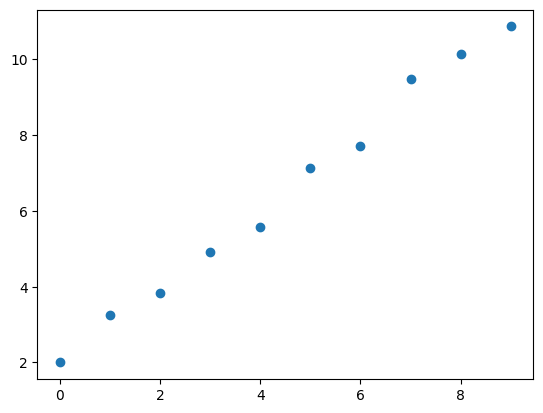

In [30]:
alpha = eigenvalues[0]/2
E_div_alpha = eigenvalues/alpha
_ = np.arange(0, len(eigenvalues), 1)
plt.scatter(_, E_div_alpha)